# Notebook #3: EDA: exploración de los datos

In [1]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../..')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

# EDA

- Infracciones 2010 - 2017: durante este periodo de tiempo, las infracciones fueron distribuidas en 10 categorías distintas. Las más presentes, con más de un 10% de aparición durante estos años son: transitar sin casco, via contraria, violar la luz roja y transitar sin cinturón. Solo en esas 4 categorías se agrupa más del 50% de las infracciones en este periodo de años, lo que indica que el comportamiento de los conductores no está alineado a su propia autoconservación. La falta de estas 4 cosas pone en total peligro a quienes conducen. sin dejar de lado que en las demás infracciones también aparecen "hablar por el teléfono celular" y "giro prohibido", las cuáles también atentan contra la integridad de la persona.

La presencia de estas, primordialmente se mantiene en grandes números en los años ya mencionados. Puede que en algún año disminuya, pero en otros aumenta más de lo que normalmente acostumbra. Sin embargo, su presencia es notable. 

- Infracciones 2018 - 2024: durante esos años, el número general de infracciones se eleva bastante. Esto llegando a superar las 2 millones (MM) de infracciones. Este número venía en aumento desde el 2018 pero se vio reducido durante la pandemia. No será hasta el 2022 cuando se consigue superar este número, considerando que apenas 2 años después del periodo anterior se superó la unidad de millón (MM) de infracciones. Para después del 2022, se se un descenso que luego vuelve a aumentar para el año anterior (2024).

Se debe resaltar que en estos años, la introducción de distintas infracciones en el registro puede que haya aumentado el número de estas. Llegando a tener hasta 100 tipos de infracciones distintas, es lógico que el número pueda verse aumentado. Sin embargo, aquellas que ponen en peligro a los conductores siguen liderando los números de presencialidad. Llegando a registrarse más de medio millón de infracciones con relación al "no uso del caso protector". Lo cuál puede parecer una locura, queda claro que es preocupante pero a la ez preocupa que cada año al menos 180 mil infracciones sean por no usar el casco protector.

In [2]:
df_infracciones_1 = pd.read_csv('../../Datos/infracciones/df_infracciones_1.csv', index_col=0)
df_infracciones_2 = pd.read_csv('../../Datos/infracciones/df_infracciones_2.csv', index_col=0)

In [3]:
pivot_infracciones_1 = f.crear_tabla_pivote(df_infracciones_1, values='total', index='infracciones', columns='anio', aggfunc='sum')
pivot_infracciones_1['total'] = pivot_infracciones_1.sum(axis=1)
pivot_infracciones_1.reset_index(inplace=True)

In [4]:
total_pivot = pivot_infracciones_1['total'].sum()
pivot_infracciones_1['porcentaje'] = (pivot_infracciones_1['total']/total_pivot) * 100
pivot_infracciones_1 = pivot_infracciones_1.sort_values(by='porcentaje', ascending=False)

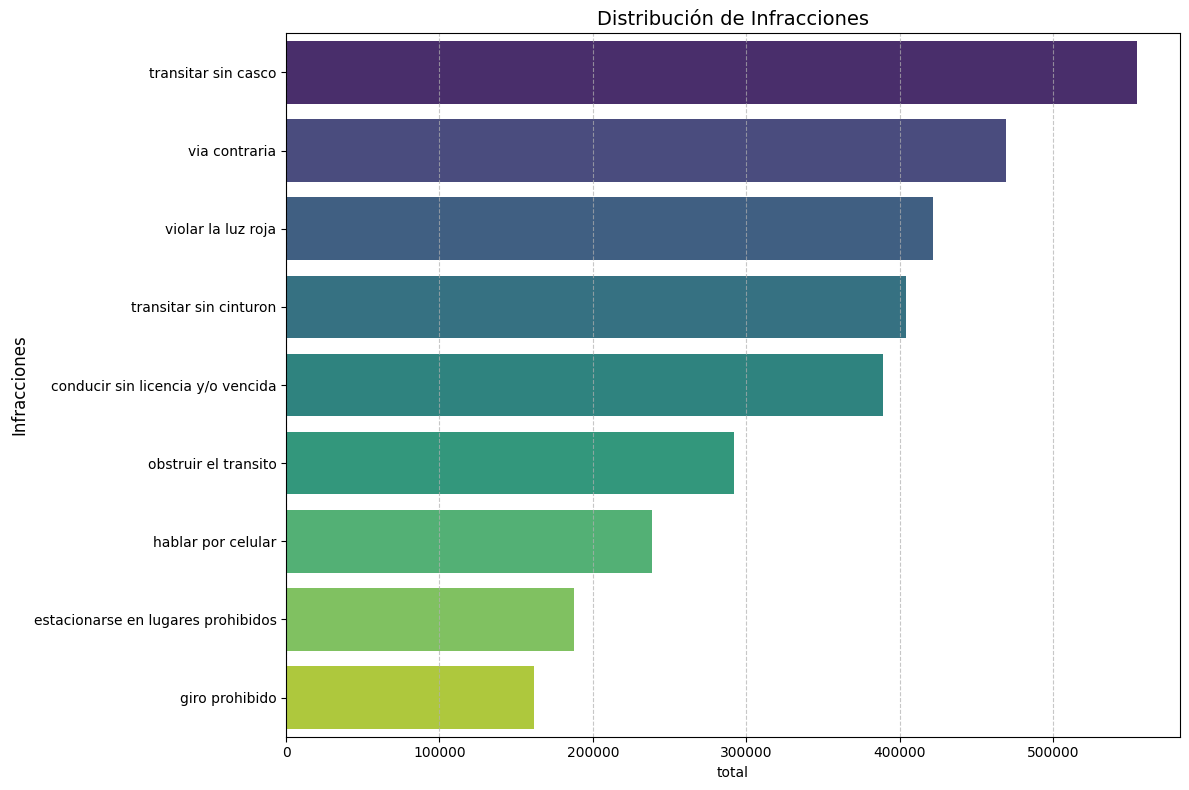

In [5]:
# Crear el gráfico de columnas
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total', 
    y='infracciones', 
    palette='viridis',
    data=pivot_infracciones_1
)

# Configuración del gráfico
plt.title('Distribución de Infracciones', fontsize=14)
plt.ylabel('Infracciones', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

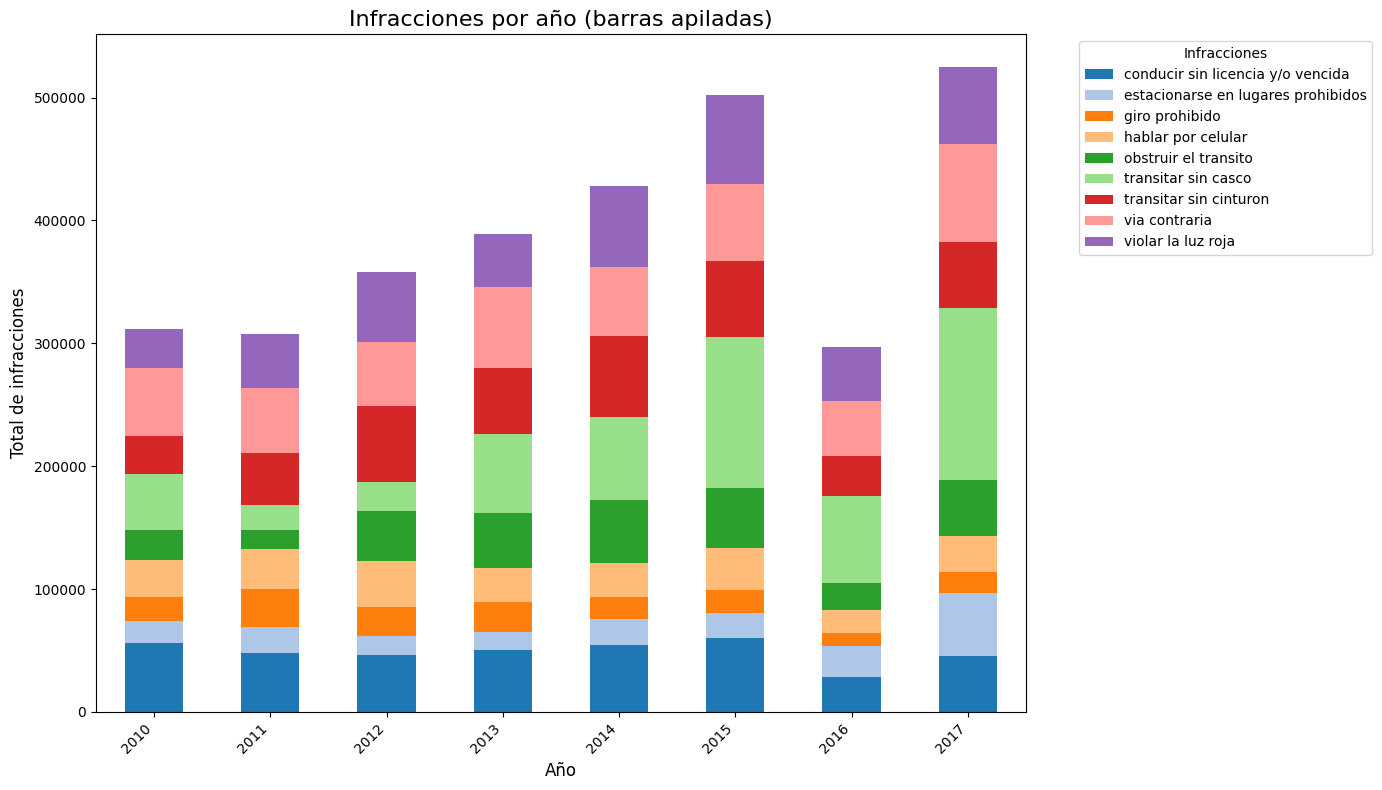

In [6]:
# Tabla pivot para que los años sean el índice y las infracciones sean las columnas
df_pivot = f.crear_tabla_pivote(df_infracciones_1,
    index='anio', 
    columns='infracciones', 
    values='total', 
    aggfunc='sum'
)

# Creo el gráfico de barras apiladas
df_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=plt.cm.tab20.colors  # Colores para las infracciones
)

# Personalizo el gráfico
plt.title('Infracciones por año (barras apiladas)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Total de infracciones', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Infracciones', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()


## Segundo grupo de años 2018-2024

In [7]:
pivot_infracciones_2 = f.crear_tabla_pivote(df_infracciones_2, values='total', index='infracciones', columns='anio', aggfunc='sum')
pivot_infracciones_2['total'] = pivot_infracciones_2.sum(axis=1)
pivot_infracciones_2.reset_index(inplace=True)
pivot_infracciones_2['porcentaje'] = (pivot_infracciones_2['total']/pivot_infracciones_2['total'].sum()) * 100
pivot_infracciones_2 = pivot_infracciones_2.sort_values(by='porcentaje', ascending=False)

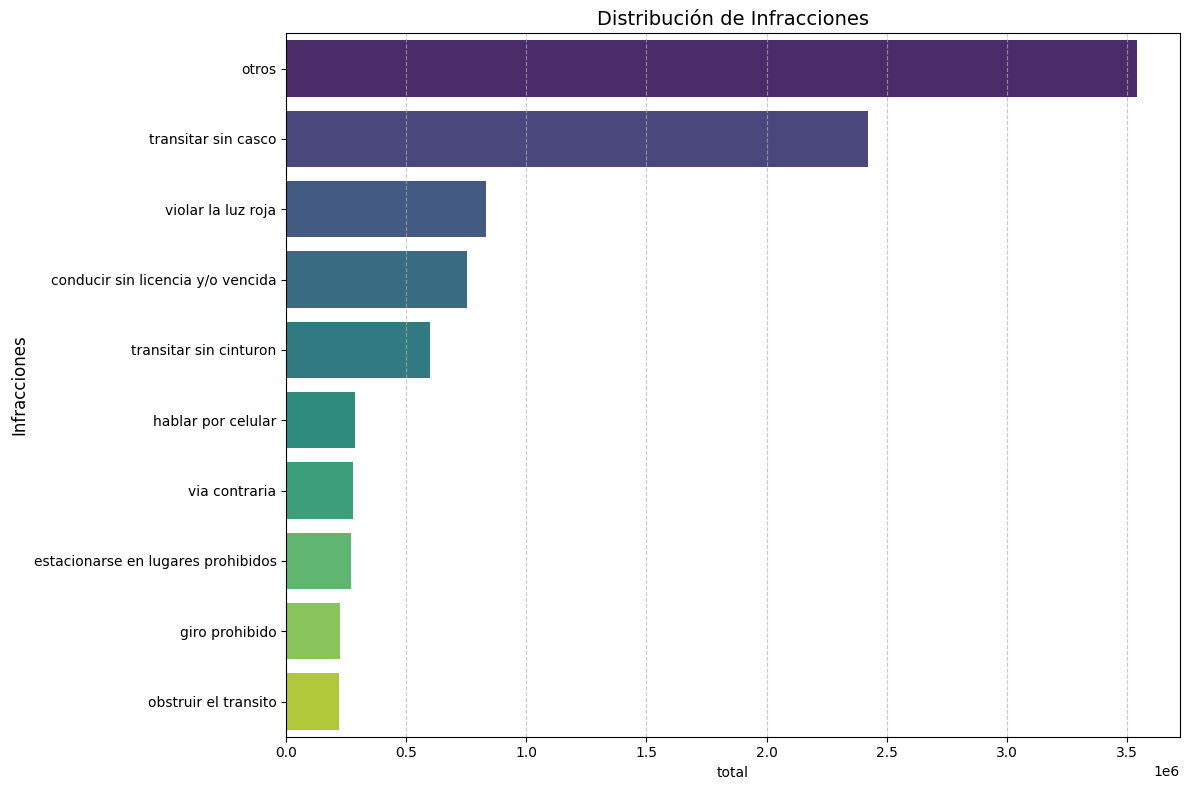

In [8]:
# Creo el gráfico de columnas
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total', 
    y='infracciones', 
    palette='viridis',
    data=pivot_infracciones_2
)

# Configuración del gráfico
plt.title('Distribución de Infracciones', fontsize=14)
plt.ylabel('Infracciones', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

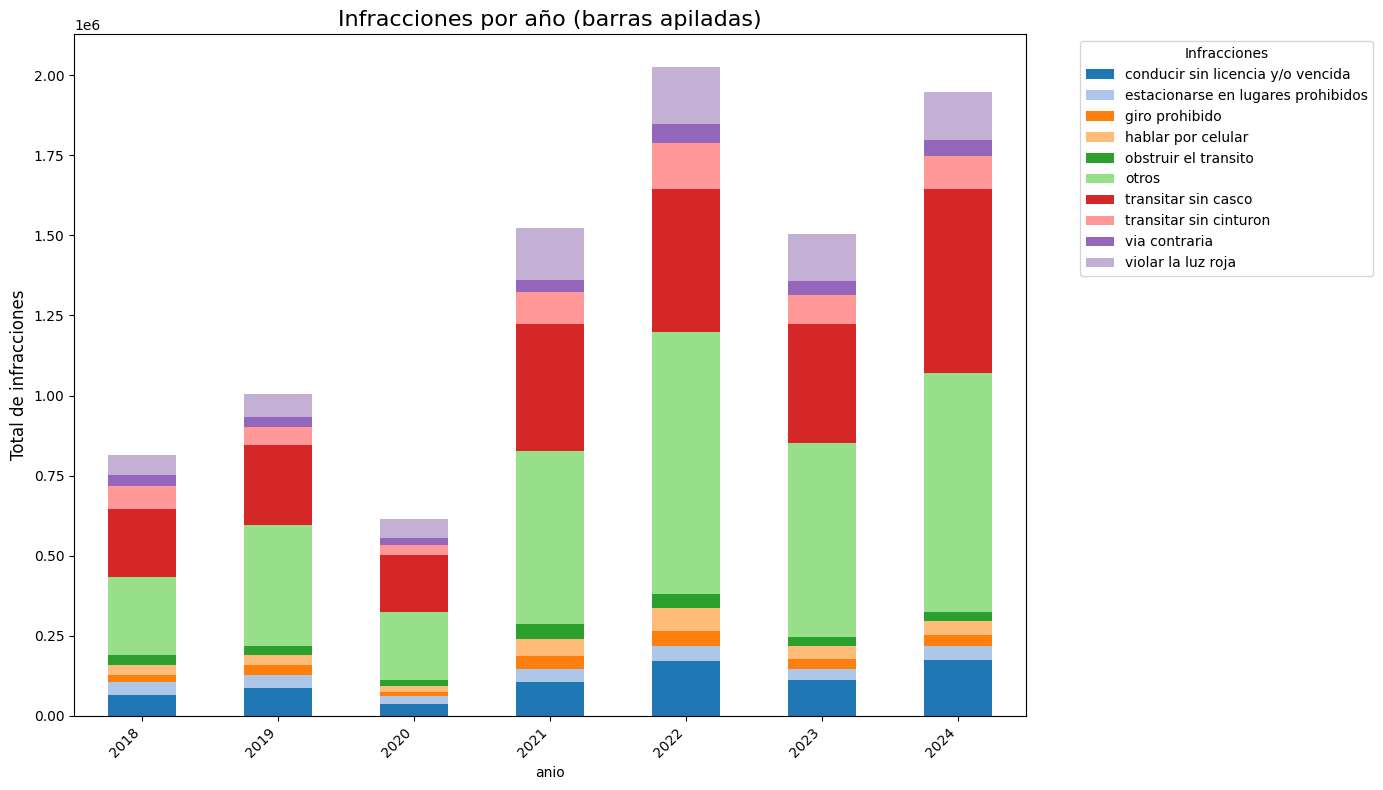

In [9]:
# Hago data frame pivot para que los años sean el índice y las infracciones sean las columnas
df_pivot_2 = f.crear_tabla_pivote(df_infracciones_2,
    index='anio', 
    columns='infracciones', 
    values='total', 
    aggfunc='sum'
)

# Creo el gráfico de barras apiladas
df_pivot_2.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=plt.cm.tab20.colors  # Colores para las infracciones
)

# Personalizo el gráfico
plt.title('Infracciones por año (barras apiladas)', fontsize=16)
plt.ylabel('Total de infracciones', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Infracciones', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

In [10]:
df_infracciones_total = pd.concat([df_infracciones_1, df_infracciones_2], ignore_index=True) #uno mis 2 data frames

In [11]:
pivot_infracciones_3 = f.crear_tabla_pivote(df_infracciones_total, values='total', index='infracciones', columns='anio', aggfunc='sum')
pivot_infracciones_3['total'] = pivot_infracciones_3.sum(axis=1)
pivot_infracciones_3.reset_index(inplace=True)
pivot_infracciones_3['porcentaje'] = (pivot_infracciones_3['total']/pivot_infracciones_3['total'].sum()) * 100
pivot_infracciones_3 = pivot_infracciones_3.sort_values(by='total', ascending=False)

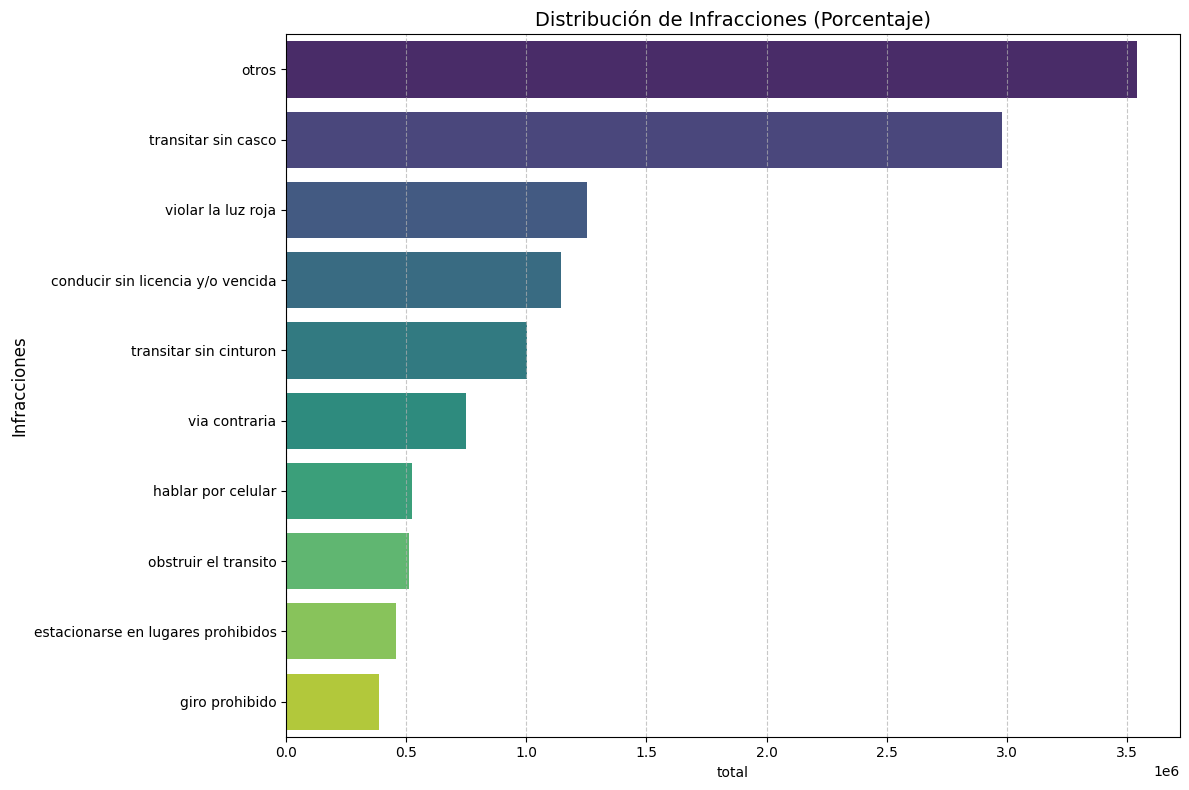

In [12]:
# Creo el gráfico de columnas
plt.figure(figsize=(12, 8))
sns.barplot(
    x='total', 
    y='infracciones', 
    palette='viridis',
    data=pivot_infracciones_3
)

# Configuración del gráfico
plt.title('Distribución de Infracciones (Porcentaje)', fontsize=14)
plt.ylabel('Infracciones', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Axes: xlabel='anio', ylabel='total'>

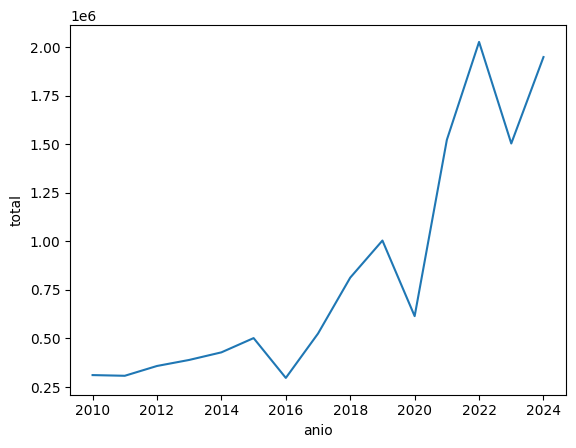

In [13]:
total_infraciones__full = df_infracciones_total.groupby('anio')['total'].sum().reset_index()
sns.lineplot(x='anio', y='total', data=total_infraciones__full)

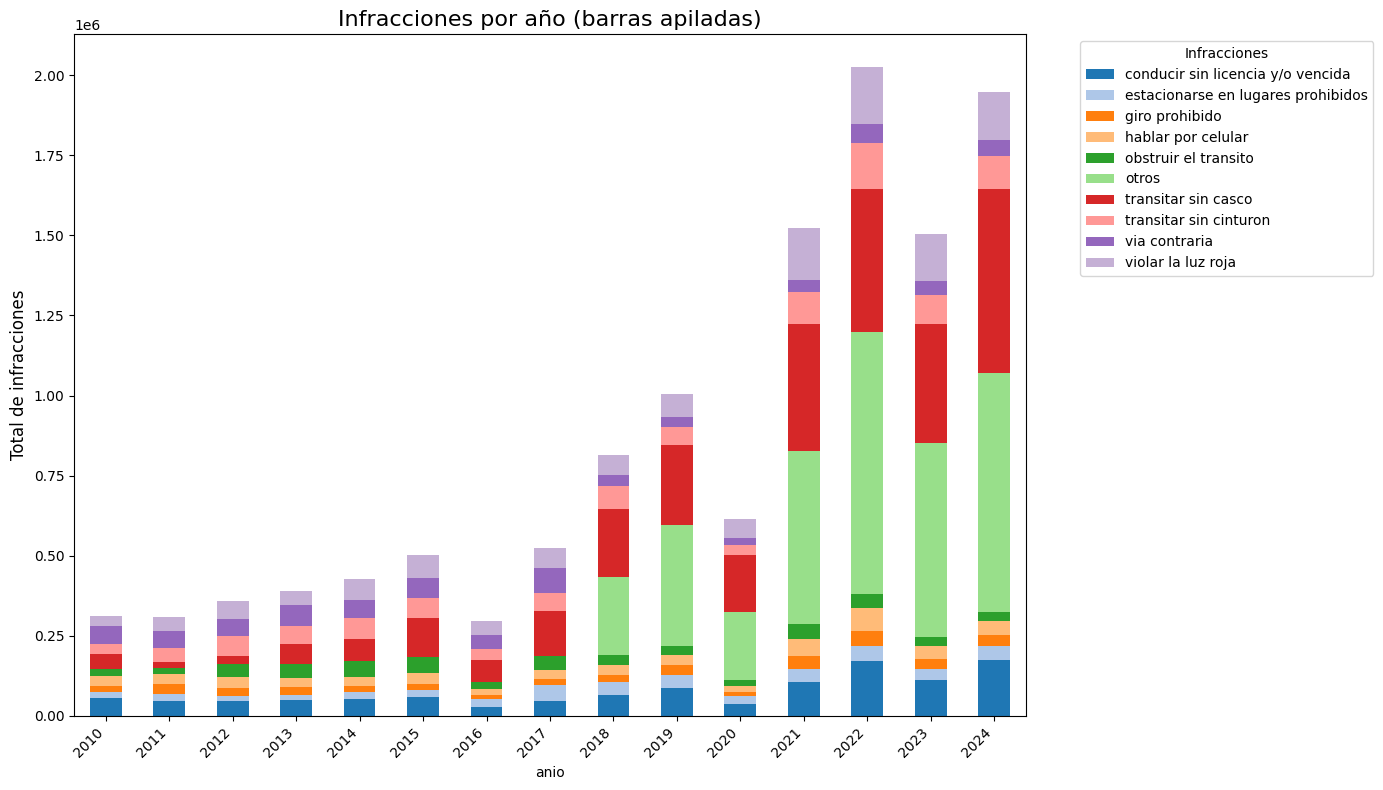

In [14]:
# Hago pivot del DataFrame para que los años sean el índice y las infracciones sean las columnas
df_pivot_3 = f.crear_tabla_pivote(df_infracciones_total,
    index='anio', 
    columns='infracciones', 
    values='total', 
    aggfunc='sum'
)

# Creo el gráfico de barras apiladas
df_pivot_3.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8),
    color=plt.cm.tab20.colors  # Colores para las infracciones
)

# Personalizo el gráfico
plt.title('Infracciones por año (barras apiladas)', fontsize=16)
plt.ylabel('Total de infracciones', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Infracciones', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()

plt.show()

In [15]:
df_infracciones_total.drop(columns='porcentaje', inplace=True)

In [16]:
df_infracciones_total.to_csv('../../Datos/infracciones/df_infracciones_completo.csv')